<a href="https://colab.research.google.com/github/Ayonator77/Combinatorics-Research/blob/master/MathResearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import operator as op
from functools import reduce
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer / denom

def calc_prob(m, n, a, b):
  F = (ncr(a+b, a)*ncr(m-a + n-b, m-a))/ncr(m+n, m)
  return F

In [ ]:
import itertools
allPaths = [ "".join( x ) for x in itertools.product( "NE", repeat=10 )
             if x.count( "N" ) == 5 and x.count( "E" ) == 5]

len(allPaths)

252

Creates an $N \times N$ grid of the probabilities of "traffic" i.e. lattice paths passing through a $(u, v) \in$ Grid.

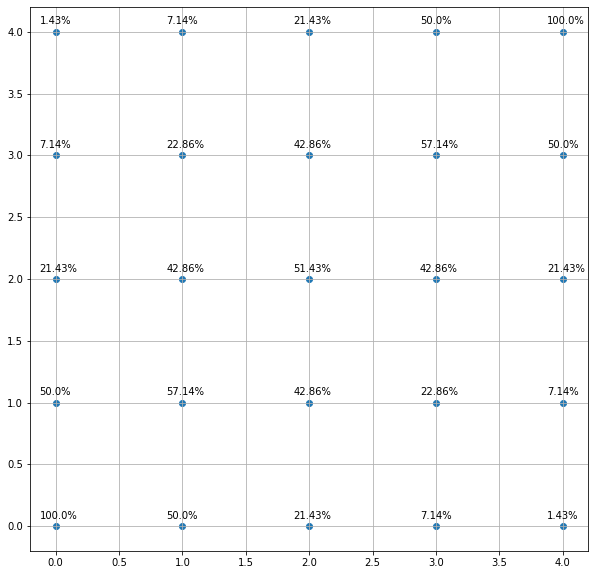

<Figure size 1500x1500 with 0 Axes>

In [ ]:
def create_grid(M, N):
  x = np.linspace(0, M, M+1)
  y = np.linspace(0, N, N+1)
  X,Y = np.meshgrid(x, y)
  position = [Y.ravel(), X.ravel()]
  fig, ax = plt.subplots()
  ax.scatter(position[1], position[0])
  prob_list = []

  for item in zip(position[0], position[1]):
    prob = calc_prob(M, N, int(item[0]), int(item[1]))
    prob *= 100
    prob = round(prob, 2)
    prob_list.append(prob)

  for i, data in enumerate(prob_list):
    ax.annotate(str(data)+"%", (position[0][i]-0.126, position[1][i]+0.06))
  plt.grid()
  fig_size = plt.rcParams["figure.figsize"]
  fig_size[0] = 10
  fig_size[1] = 10
  plt.rcParams["figure.figsize"] = fig_size
  plt.figure().set_dpi(150)

  plt.show()
  
create_grid(4,4)

Display all the Lattice paths for any grid $\subset \mathbb{N}^2$ 

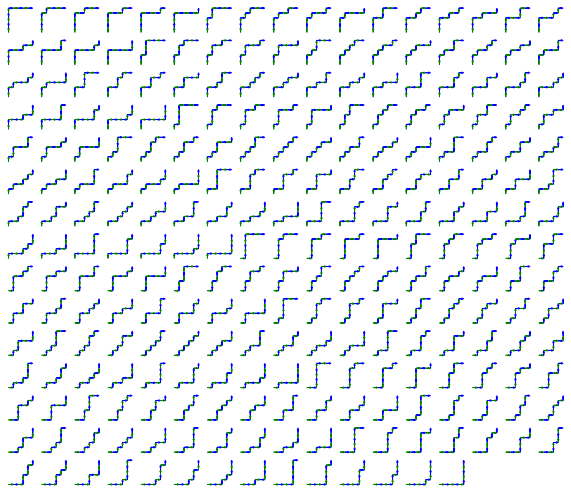

['NNNNNEEEEE', 'NNNNENEEEE', 'NNNNEENEEE', 'NNNNEEENEE', 'NNNNEEEENE', 'NNNNEEEEEN', 'NNNENNEEEE', 'NNNENENEEE', 'NNNENEENEE', 'NNNENEEENE', 'NNNENEEEEN', 'NNNEENNEEE', 'NNNEENENEE', 'NNNEENEENE', 'NNNEENEEEN', 'NNNEEENNEE', 'NNNEEENENE', 'NNNEEENEEN', 'NNNEEEENNE', 'NNNEEEENEN', 'NNNEEEEENN', 'NNENNNEEEE', 'NNENNENEEE', 'NNENNEENEE', 'NNENNEEENE', 'NNENNEEEEN', 'NNENENNEEE', 'NNENENENEE', 'NNENENEENE', 'NNENENEEEN', 'NNENEENNEE', 'NNENEENENE', 'NNENEENEEN', 'NNENEEENNE', 'NNENEEENEN', 'NNENEEEENN', 'NNEENNNEEE', 'NNEENNENEE', 'NNEENNEENE', 'NNEENNEEEN', 'NNEENENNEE', 'NNEENENENE', 'NNEENENEEN', 'NNEENEENNE', 'NNEENEENEN', 'NNEENEEENN', 'NNEEENNNEE', 'NNEEENNENE', 'NNEEENNEEN', 'NNEEENENNE', 'NNEEENENEN', 'NNEEENEENN', 'NNEEEENNNE', 'NNEEEENNEN', 'NNEEEENENN', 'NNEEEEENNN', 'NENNNNEEEE', 'NENNNENEEE', 'NENNNEENEE', 'NENNNEEENE', 'NENNNEEEEN', 'NENNENNEEE', 'NENNENENEE', 'NENNENEENE', 'NENNENEEEN', 'NENNEENNEE', 'NENNEENENE', 'NENNEENEEN', 'NENNEEENNE', 'NENNEEENEN', 'NENNEEEENN', 'NENE

In [ ]:
length = 0.18
width= 0.001
head_width = 0.05

def drawPath( ax, path ):
    x = float(head_width)
    y = float(head_width)
    color = "green"
    
    ax.set_aspect('equal', 'box' )
    for d in path:
        if d == "N":
            dx = 0.0
            dy = length
        else:
            dx = length
            dy = 0.0
        ax.arrow( x, y, dx, dy,
                  width = width,
                  head_width = head_width,
                  color = color,
                  length_includes_head = True )
        x += dx
        y += dy
        if color == "blue":
            color = "green"
        else:
            color = "blue"

for i, p in enumerate( allPaths ):
    ax = plt.subplot( 17, 17, i + 1 )
    ax.axis( "off" )
    drawPath( ax, p )

plt.show()
print(allPaths)

In [ ]:
def plotprob3D(M, N):
  fig = plt.figure()
  ax = plt.axes(projection="3d")
  x = np.linspace(0, M, M+1)
  y = np.linspace(0, N, N+1)
  X,Y= np.meshgrid(x, y)
  #Z = z = [[calc_prob(M,N, int(X[i][j]), int(Y[i][j]) for i in range(M)] for j in range(N)]
  #print(Z)
  position = [Y.ravel(), X.ravel()]
  z = []
  for item in zip(position[0], position[1]):
    prob = calc_prob(M, N, int(item[0]), int(item[1]))
    prob *= 100
    prob = round(prob, 2)
    z.append(prob)
  z = np.array(z)
  #cs = plt.contour(X,Y,)
  ax.scatter3D(X, Y, z)
  ax.set_xlabel('X-axis')
  ax.set_ylabel('Y-axis')
  ax.set_zlabel('Z-axis')
  print(len(x), len(y), len(z))


plotprob3D(50, 50)

path_obs takes in coordinates $(m, n, u, v)$ where $(m , n)$ is the size of the grid and $(u, v)$ is the coordinates for the obstruction
it then returns a dictionary, the keys of the dictionary represent the coordinates on the grid and the corresponding values represent 
the precentage  that traffic will pass through said coordinate, It then plots the points $(i , j)$ with the probablity that maps to it on a 3D grid. This algorithm requires us to define four quadrants $QI, QII, QIII, QIV$ such that $\begin{cases}
    &QI = \{(i, j): i > u,\ j < v \}\\
    &QII = \{(i, j): i \leq u,\ j \leq v\}\\
    &QIII = \{(i, j): i \geq u,\ j \geq v\}\\
    &QIV = \{(i, j): i < u,\ j > v \}
    \end{cases} $

The probability of traffic passing through a point is then a function of which quadrant the point lies in and where the obstruction is located.

{(0, 0): 0, (0, 1): 50.0, (0, 2): 50.0, (0, 3): 12.5, (1, 0): 50.0, (1, 1): 0, (1, 2): 37.5, (1, 3): 25.0, (2, 0): 50.0, (2, 1): 37.5, (2, 2): 50.0, (2, 3): 50.0, (3, 0): 12.5, (3, 1): 25.0, (3, 2): 50.0, (3, 3): 0}


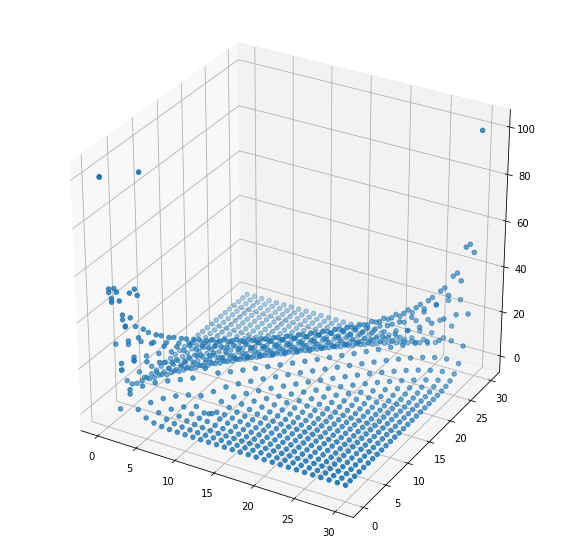

In [ ]:
x = [] # x coordinates in the grid
y = [] # y coordinates in the grid 
z = [] # proboability of traffic pasing through each x and y 
def path_obs(m, n, u, v):
  prob_list = {}
  total_paths = ncr(m+n, m) - ncr(u+v, u)*ncr(m-u + n-v, m-u)
  for i in range(m+1):
      for j in range(n+1):
          x.append(i)
          y.append(j)
          i, j = int(i), int(j)
          i_str, j_str = str(i), str(j)
          if i == u and j == v:
              prob_list[(i, j)] = 0
              z.append(0)
          elif (i > u and j < v) or i < u and j > v:  # Q1 or QIV
              prob1 = 100*(ncr(i + j, i) * ncr(m-i + n-j, m-i))/total_paths
              prob_list[(i, j)] = prob1
              z.append(prob1)
          elif i <= u and j <= v:  # QII
              prob2 = 100*(ncr(i+j, i)* (ncr(m-i + n-j, m-i) - ncr(u-i + v-j, u-i)*ncr(m-u + n-v, m-u)))/total_paths
              prob_list[(i, j)] = prob2
              z.append(prob2)
          elif i >= u and j >= v:  # QIII
              prob3 = 100 * (ncr(i + j, i) - ncr(u+v, u)*ncr(i-u + j-v, i-u))*(ncr(m-i + n-j, m-i))/total_paths
              prob_list[(i, j)] = prob3
              z.append(prob3)
  prob_list[(0, 0)] = 0
  prob_list[(m , n)] = 0
  return prob_list

print(path_obs(3, 3, 1, 1))

fig = plt.figure()
ax = plt.axes(projection="3d")
pa = path_obs(30, 30, 10, 5)
ax.scatter3D(x, y, z)
#plt.scatter(x, y)

In [ ]:
import math

"""Regular Euclidean Distance formula"""
def dist(p1 , p2):
  return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

""" A procedure to find all the points where the maximum occurs in the grid"""
def find_max(dic):
  curr_val = 0
  max_val = 0
  new_dict = {}
  for key in dic.keys():
    curr_val = dic[key]
    if max_val < curr_val:
      new_dict.clear()
      max_val = curr_val
      new_dict[key] = max_val
    elif max_val == curr_val:
      new_dict[key] = max_val
  return new_dict

"""Given a specific coordinate for home which will be at (0, n) find the point closest to it, the dic should be find_max(path_obs(m, n, u, v))"""
def get_home(home, dic):
  p_dic = {}
  for point in dic.keys():
    p_dic[point] = dist(home, point) # distance from home
  min_dist = min(p_dic.values())
  min_key = [key for key in p_dic if p_dic[key] ==  min_dist]
  return min_key

Plot containing a line from each valid obstruction coordinate $(i, j, 0)$ to the coordinates of its maximum place $(c, d, 1)$

In [ ]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as plt3d

def plot_obs_max(M, N):
  fig = plt.figure()
  ax = plt.axes(projection ="3d")
  x_ = []
  y_ = []
  z_ = []
  x_obs = []
  y_obs = []
  z_obs = []
  for i in range(1, M):
    for j in range(1, N):
      # Each valid obstruction (i, j, 0)
      x_obs.append(i)
      y_obs.append(j)
      z_obs.append(0)
      # Maximum value (k, l, 1)
      max_place = get_home((0, N), find_max(path_obs(M, N, i, j)))[0]
      x_.append(max_place[0])
      y_.append(max_place[1])
      z_.append(1)


  ax.scatter3D(x_obs, y_obs, z_obs)
  ax.scatter3D(x_, y_, z_)
  for i in range(len(x_obs)):
    x_val = [x_[i], x_obs[i]]
    y_val = [y_[i], y_obs[i]]
    z_val = [1, 0]
    ax.plot3D(x_val, y_val, z_val)

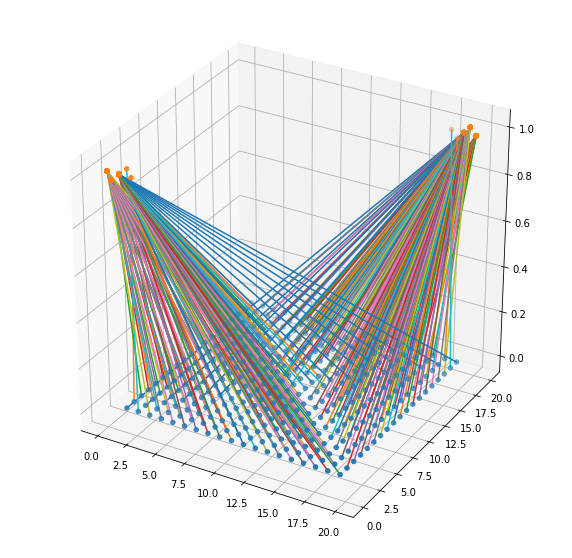

In [ ]:
plot_obs_max(20, 20)

Labeling the points of obstructions and the given maximums that occur for a particular $M \times N$ grid

[(0, 2)]


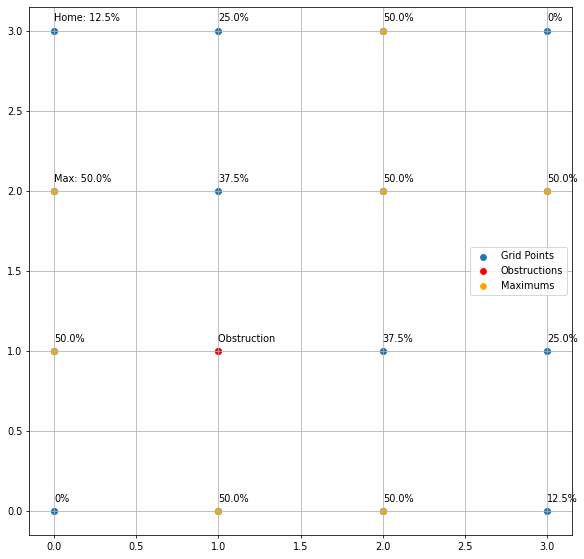

In [ ]:
x = []
y = []
m = 3
n = 3
fig, ax = plt.subplots()
grid = path_obs(m, n, 1, 1)
for i in range(m+1):
  for j in range(n+1):
    x.append(i)
    y.append(j)
for k in grid.keys():
  if k == (1, 1):
    ax.annotate("Obstruction ", (k[0], k[1]+.06))
  elif k == (0, 2):
    ax.annotate("Max: "+str(grid[k])+"%", (k[0], k[1]+.06))
  elif k == (0, n):
    ax.annotate("Home: "+str(grid[k])+"%", (k[0], k[1]+.06))
  else:
    ax.annotate(str(grid[k])+"%", (k[0], k[1]+.06))
plt.grid()
a = plt.scatter(x, y,)
b = plt.scatter([1], [1], c='red')
for k in find_max(grid):
  c = plt.scatter([k[0]], [k[1]], c='orange')
plt.legend((a, b , c), ("Grid Points", "Obstructions", "Maximums"))
fig.set_dpi(70)
print(get_home((0, n),find_max(grid)))